# Load Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Contextualise

In [ ]:
!python3 --version

Python 3.7.12


In [ ]:
import torch
!pip3 install flair
#!pip3 install flair==0.4.4
!pip3 install scikit-learn==0.21.3
!pip3 install git+https://www.github.com/keras-team/keras-contrib.git
!pip3 install scipy==1.3.1
!pip3 install gensim==3.8.1
!pip3 install numpy==1.17.2
!pip3 install sentence-transformers


  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-czkzoxti
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-czkzoxti


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Test GPU

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
import gc

Main

In [ ]:

!python3 /content/drive/MyDrive/ConWea-master/contextualize.py --dataset_path "/content/drive/MyDrive/ConWea-master/data/legal-2g/" --temp_dir "/content/drive/MyDrive/ConWea-master/context-2g_temp/" --gpu_id 0

Getting BERT vectors...
Downloading: 100% 28.0/28.0 [00:00<00:00, 37.8kB/s]
Downloading: 100% 570/570 [00:00<00:00, 784kB/s]
Downloading: 100% 226k/226k [00:00<00:00, 2.91MB/s]
Downloading: 100% 455k/455k [00:00<00:00, 4.72MB/s]
Downloading: 100% 420M/420M [00:06<00:00, 69.9MB/s]
Finished sentences: 0 out of 9380
Finished sentences: 100 out of 9380
Finished sentences: 200 out of 9380
Finished sentences: 300 out of 9380
Finished sentences: 400 out of 9380
Finished sentences: 500 out of 9380
Finished sentences: 600 out of 9380
Finished sentences: 700 out of 9380
Finished sentences: 800 out of 9380
Finished sentences: 900 out of 9380
Finished sentences: 1000 out of 9380
Finished sentences: 1100 out of 9380
Finished sentences: 1200 out of 9380
Finished sentences: 1300 out of 9380
Finished sentences: 1400 out of 9380
Finished sentences: 1500 out of 9380
Finished sentences: 1600 out of 9380
Finished sentences: 1700 out of 9380
Finished sentences: 1800 out of 9380
Finished sentences: 1900 out

In [ ]:
!python3 /content/drive/MyDrive/ConWea-master/data/legal/df.pkl

  File "/content/drive/MyDrive/ConWea-master/data/legal/df.pkl", line 1
SyntaxError: Non-UTF-8 code starting with '\x80' in file /content/drive/MyDrive/ConWea-master/data/legal/df.pkl on line 1, but no encoding declared; see http://python.org/dev/peps/pep-0263/ for details


In [ ]:
python -m unittest content/drive/MyDrive/ConWea-master/tests/test_contextualize.py

SyntaxError: ignored

Train

In [ ]:
import torch
import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
!python3 /content/drive/MyDrive/ConWea-master/train1.py --dataset_path "/content/drive/MyDrive/ConWea-master/data/legal/" --gpu_id 0

Considering all interpretations of seed words..
Facts
********************************************************************************
dated
alleged
report
statements
found
Ratio of the decision
********************************************************************************
provisions
contention
opinion
Ruling by Present Court
********************************************************************************
allowed
costs
Argument
********************************************************************************
contended
argued
relied
Precedent
********************************************************************************
stated
considered
Ruling by Lower Court
********************************************************************************
vide
modified
accepted
Statute
********************************************************************************
deals
reads
provides
Preprocessing data..
Finished rows: 0 out of 9380
/content/drive/MyDrive/ConWea-master/train1.py:81: SettingWithCopy

PreProcess Data

Using 2-grams

In [ ]:
#kwords = ["order dated","appellant filed","Court dismissed","Court order","provisions","evidence","Appeal allowed","Appeal dismissed","Civil Appeal","impugned order","learned counsel","counsel appearing","counsel contended","counsel argued","counsel relied","respondents contended","case held","Court made","Court stated","Court considered","Court vide","Court set","court judgment","Court observed","Court offences","Court modified","Court accepted","Act deals","Act reads","Act provides","section reads","Act makes"]
kwords_1 = ["respondent-filed","appellant-filed","appellant-made","court-dismissed","court-order","court-finds","true","appeal-allowed","appeal-dismissed","civil-appeal","contended","submitted","urged","case-held","court-made","principle","court-vide","court-sentenced","court-judgment","court-offences","court-modified","act-deals","act-reads","act-provides","section-reads","act-makes"]

In [ ]:
kwords = []
for i in range(len(kwords_1)):
  kwords.append(kwords_1[i].replace("-"," ").lower()) #lower to simplify things.. will lower everything in dataset too.. 


In [ ]:
kwords[1]

'appellant filed'

In [ ]:
import pandas as pd
import pickle
df = pickle.load(open("/content/drive/MyDrive/ConWea-master/data/legal2g/df.pkl","rb"))

In [ ]:
df['sentence'] = df['sentence'].str.lower()

In [ ]:
df

,index,sentence,label
0,0,this appeal is preferred against the judgment ...,Facts
1,1,"briefly stated, case of the prosecution is tha...",Facts
2,2,"at that time, jage ram (a-1) and his sons rajb...",Facts
3,3,"raju (a-2), rakesh (a-3) and madan (a-4) armed...",Facts
4,4,wordy altercations ensued between the parties ...,Facts
...,...,...,...
9375,158,"the judgment of the high court,therefore,canno...",Ruling by Present Court
9376,159,it is set aside accordingly and the order of d...,Ruling by Present Court
9377,160,the appeal is allowed,Ruling by Present Court
9378,161,no costs,Ruling by Present Court


In [ ]:
for i in range(len(kwords_1)):
  df['sentence'] = df['sentence'].replace(kwords[i],kwords_1[i])

In [ ]:
df.to_pickle("/content/drive/MyDrive/ConWea-master/data/legal-2g/df.pkl")

<h1>Welcome to Colab!</h1>

If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view, and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  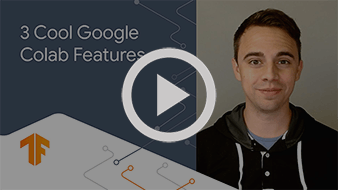
  </a>
</center>




<h1>What is Colab?</h1>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with 
- Zero configuration required
- Free access to GPUs
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

## **Getting started**

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

## Data science

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

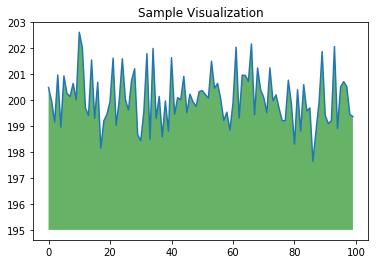

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

## Machine learning

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

## More Resources

### Working with Notebooks in Colab
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)


<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

### Featured examples

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
